In [2]:
!pip install kaggle


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"


In [12]:
!kaggle datasets download -d laotse/credit-risk-dataset


Dataset URL: https://www.kaggle.com/datasets/laotse/credit-risk-dataset
License(s): CC0-1.0
  0% 0.00/368k [00:00<?, ?B/s]
100% 368k/368k [00:00<00:00, 65.7MB/s]


In [13]:
!unzip credit-risk-dataset.zip


Archive:  credit-risk-dataset.zip
  inflating: credit_risk_dataset.csv  


In [23]:
data = pd.read_csv("/content/credit_risk_dataset.csv")

In [24]:
print(data.columns)


Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')


In [25]:

data = data.dropna()


print(data.isnull().sum())


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


data = pd.read_csv('credit_risk_dataset.csv')

features = [
    'loan_percent_income',
    'loan_amnt',
    'person_income',
    'person_emp_length'
target = 'loan_status'


data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)


label_encoder = LabelEncoder()
data[target] = label_encoder.fit_transform(data[target])


scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])


X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")


              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5072
           1       0.72      0.28      0.40      1445

    accuracy                           0.82      6517
   macro avg       0.78      0.63      0.65      6517
weighted avg       0.80      0.82      0.78      6517

ROC-AUC Score: 0.73


<ipython-input-34-7e4f8ddb5400>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)


<ipython-input-35-5b17f7eedc9a>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)


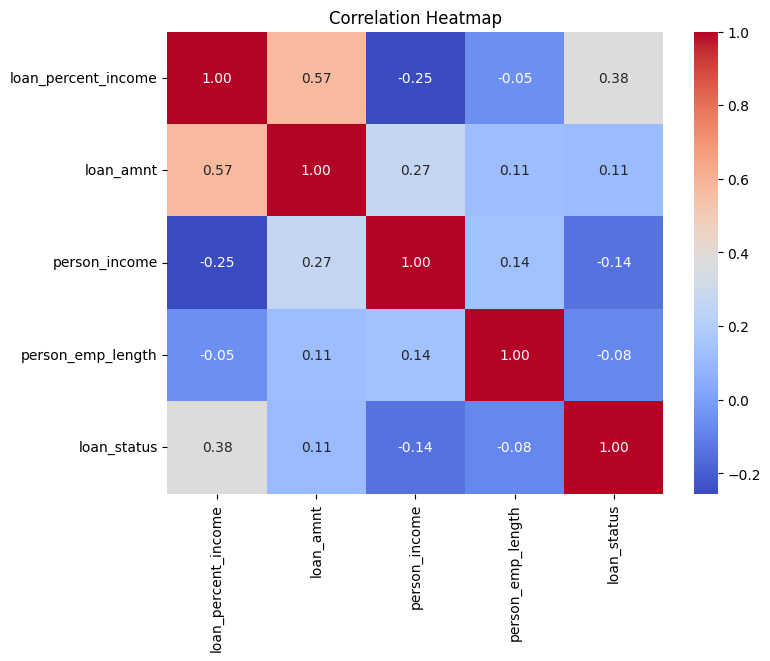

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder


data = pd.read_csv('credit_risk_dataset.csv')


features = [
    'loan_percent_income',
    'loan_amnt',
    'person_income',
    'person_emp_length'
]

target = 'loan_status'


data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)


label_encoder = LabelEncoder()
data[target] = label_encoder.fit_transform(data[target])


scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])


correlation_matrix = data[features + [target]].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
